In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("salaryData.csv")

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
 df.shape #375 gözlem 6 öznitelik

(375, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [9]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [18]:
def grab_col_names(df, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 375
Variables: 6
cat_cols: 2
num_cols: 3
cat_but_car: 1
num_but_cat: 0


In [15]:
cat_cols

['Gender', 'Education Level']

In [16]:
num_cols

['Age', 'Years of Experience', 'Salary']

In [17]:
cat_but_car

['Job Title']

In [21]:
def check_df(df, head=5):
    print("##################### Shape #####################")
    print(df.shape)
    
    print("##################### Types #####################")
    print(df.dtypes)
    
    print("##################### Head #####################")
    print(df.head(head))
    
    print("##################### Tail #####################")
    print(df.tail(head))
    
    print("##################### NA #####################")
    print(df.isnull().sum())
    
    print("##################### Describe #####################")
    print(df.describe().T)


In [20]:
check_df(df)

##################### Shape #####################
(375, 6)
##################### Types #####################
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
##################### Head #####################
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
##################### Tail #####################
      Age  Gender Education Level                      Job

In [22]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("##########################################")
    if plot:
        sns.countplot(x=df[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)


        Gender      Ratio
Gender                   
Male       194  51.733333
Female     179  47.733333
##########################################
                 Education Level      Ratio
Education Level                            
Bachelor's                   224  59.733333
Master's                      98  26.133333
PhD                           51  13.600000
##########################################


count    373.000000
mean      37.431635
std        7.069073
min       23.000000
5%        27.000000
10%       29.000000
20%       31.000000
30%       33.000000
40%       35.000000
50%       36.000000
60%       39.000000
70%       42.000000
80%       45.000000
90%       47.000000
95%       49.000000
99%       51.280000
max       53.000000
Name: Age, dtype: float64


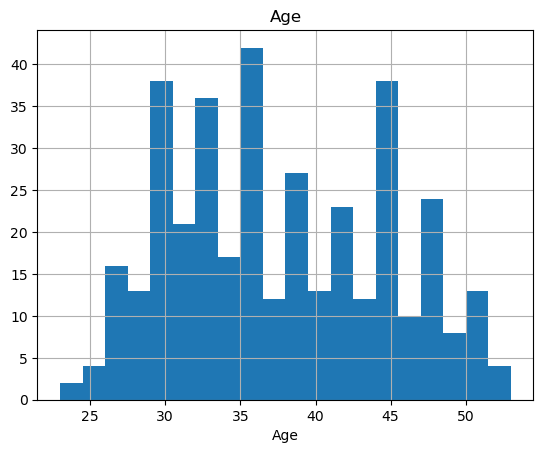

count    373.000000
mean      10.030831
std        6.557007
min        0.000000
5%         1.500000
10%        2.000000
20%        3.000000
30%        5.000000
40%        7.000000
50%        9.000000
60%       11.000000
70%       14.000000
80%       16.000000
90%       20.000000
95%       21.000000
99%       23.280000
max       25.000000
Name: Years of Experience, dtype: float64


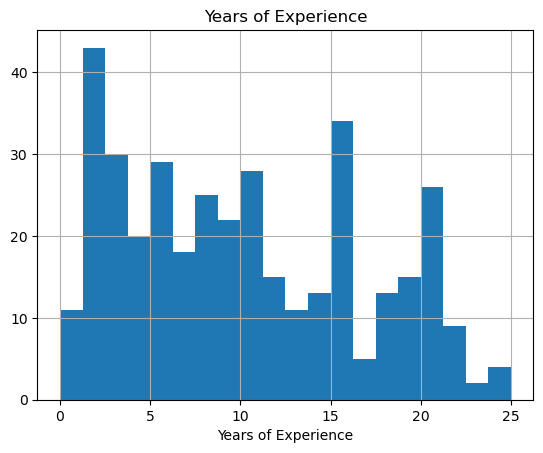

count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
5%        40000.000000
10%       40000.000000
20%       50000.000000
30%       60000.000000
40%       85000.000000
50%       95000.000000
60%      110000.000000
70%      130000.000000
80%      150000.000000
90%      170000.000000
95%      180000.000000
99%      200000.000000
max      250000.000000
Name: Salary, dtype: float64


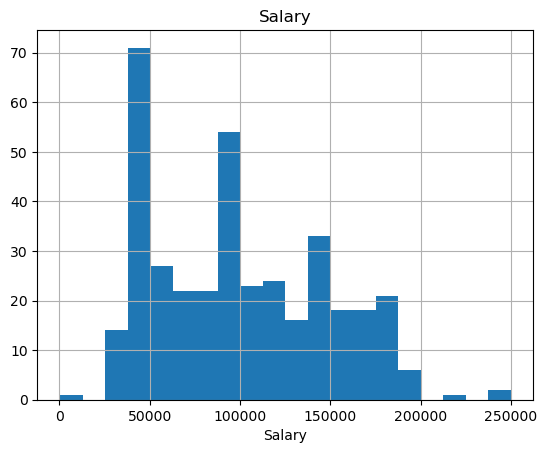

In [23]:
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [31]:
def plot_missing_data(dataframe):
    """Eksik verileri görselleştirir"""
    plt.figure(figsize=(12, 6))
    sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()

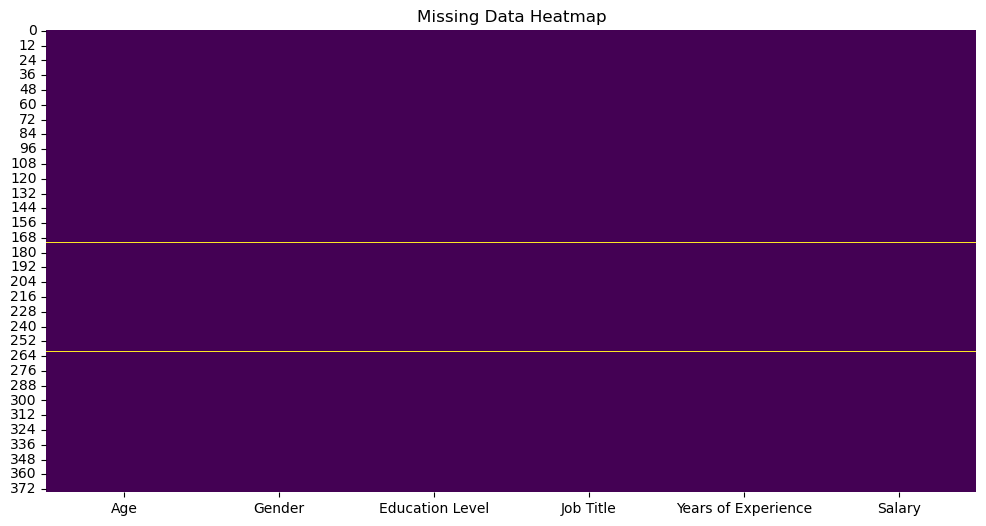

In [32]:
plot_missing_data(df)

In [35]:
def bos_degerler(dataframe):
    na_rows = dataframe[dataframe.isnull().any(axis=1)]
    return na_rows

In [36]:
bos_degerler(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def drop_na_rows(dataframe):
    dataframe_cleaned = dataframe.dropna(how='all',inplace=True)
    return dataframe_cleaned

In [43]:
drop_na_rows(df)

In [45]:
def _numeric_na_doldurma(dataframe):
    """Sayısal özelliklerdeki eksik verileri doldurur"""
    numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())
    return dataframe

In [46]:
def categorical_na_doldurma(dataframe):
    """Kategorik özelliklerdeki eksik verileri doldurur"""
    categorical_columns = dataframe.select_dtypes(include=[object]).columns.tolist()
    dataframe[categorical_columns] = dataframe[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
    return dataframe


In [47]:
## EMİN DEĞİLİM
def fill_categorical_cardinal_na(dataframe, columns, strategy='mode'):
    """Kategorik görünümlü kardinal değişkenlerdeki eksik verileri doldurur"""
    
    if strategy == 'mode':
        # En yaygın kategori ile doldurma
        for column in columns:
            dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    elif strategy == 'random':
        # Küçük bir rastgele örnekleme kullanarak doldurma
        for column in columns:
            na_indices = dataframe[column].isnull()
            fill_values = dataframe.loc[~na_indices, column]
            dataframe.loc[na_indices, column] = [random.choice(fill_values) for _ in range(na_indices.sum())]
    elif strategy == 'special_category':
        # Özel bir kategori ile doldurma
        for column in columns:
            dataframe[column].fillna('Missing', inplace=True)
    else:
        raise ValueError("Supported strategies are: 'mode', 'random', 'special_category'")
    
    return dataframe

In [49]:
def korelasyon_matrisi(dataframe, numeric_columns):
    
    correlation_matrix = dataframe[numeric_columns].corr()
    f, ax = plt.subplots(figsize=[18, 13])
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="magma")
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

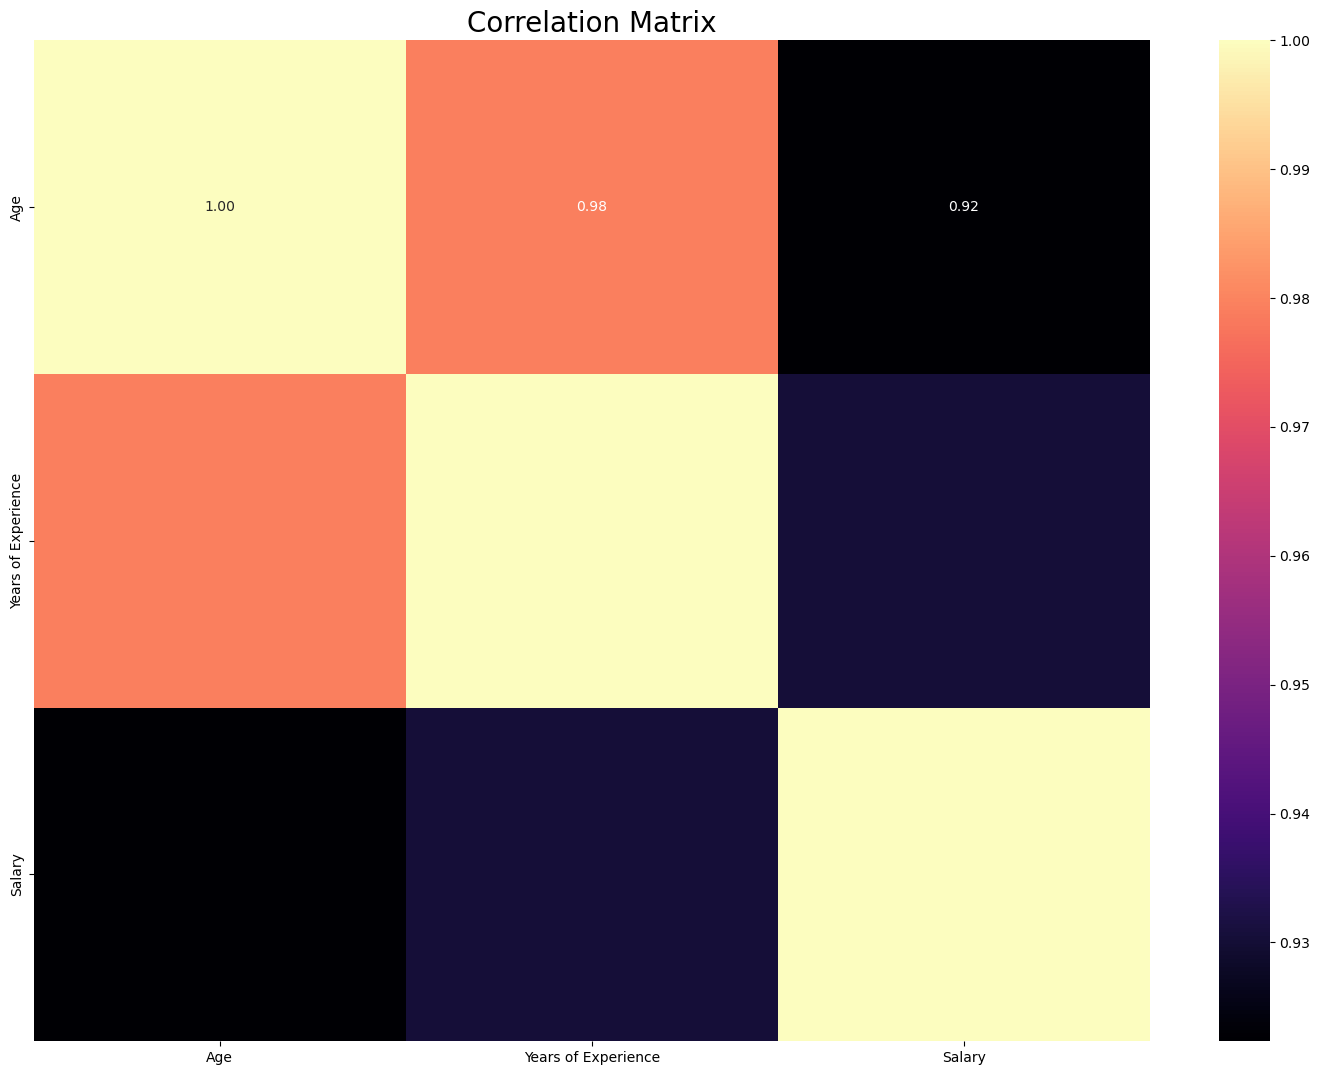

In [50]:
korelasyon_matrisi(df,num_cols)

In [51]:
def cinsiyetXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Gender', y='Salary', data=data)
    plt.title('Cinsiyete Göre Maaş Karşılaştırması')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Maaş')
    plt.show()

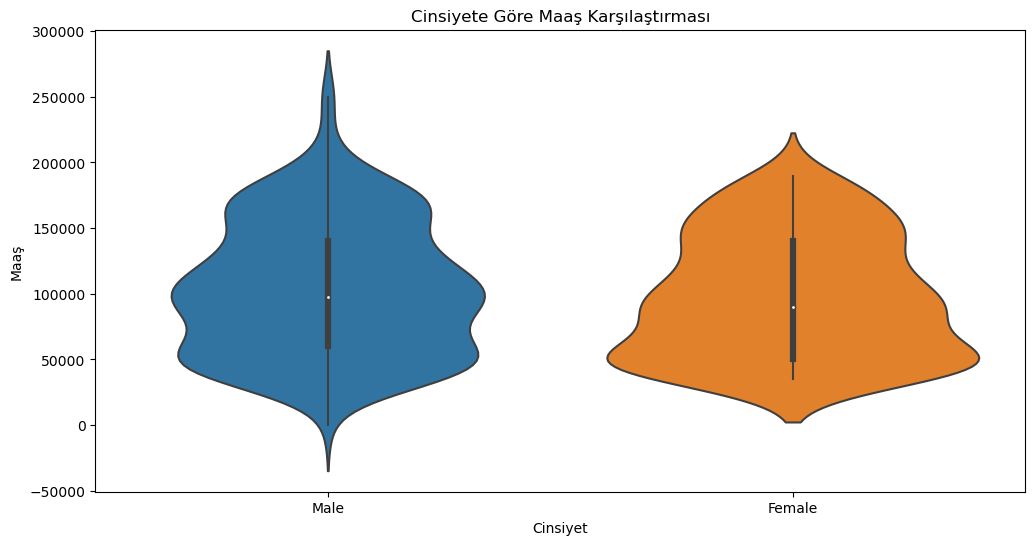

In [52]:
cinsiyetXmaas(df)

In [53]:
def egitimSeviyesiXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Education Level', y='Salary', data=data)
    plt.title('Eğitim Seviyesine Göre Maaş Dağılımı')
    plt.xlabel('Eğitim Seviyesi')
    plt.ylabel('Maaş')
    plt.show()

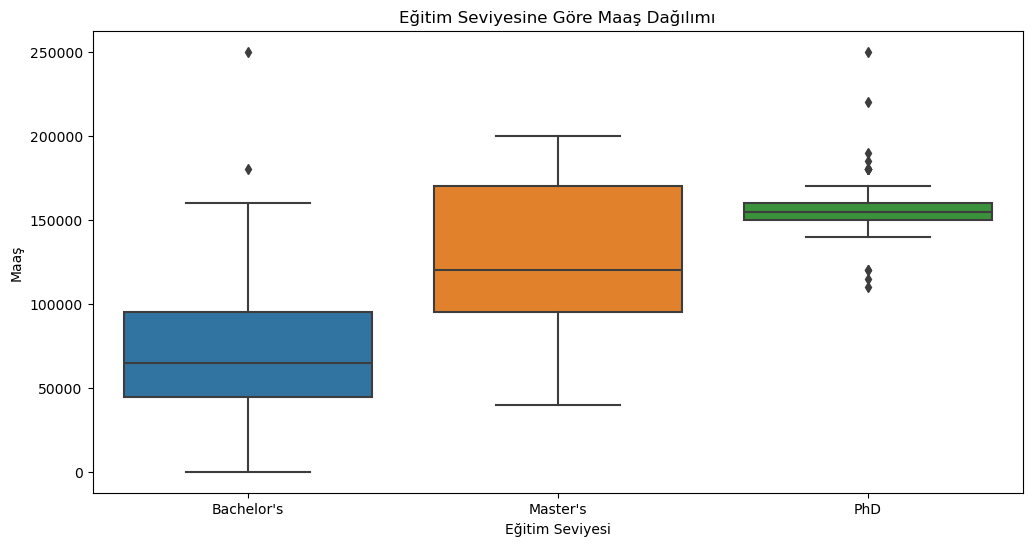

In [54]:
egitimSeviyesiXmaas(df)

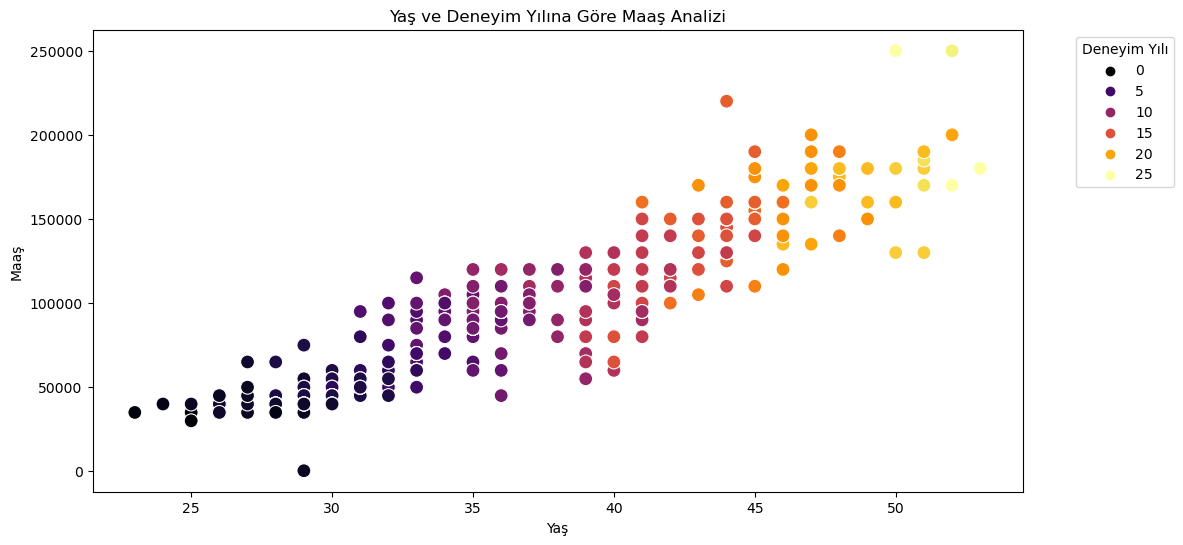

In [74]:
def yasDeneyimXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Age', y='Salary', hue='Years of Experience', data=data, palette='inferno', s=100)
    plt.title('Yaş ve Deneyim Yılına Göre Maaş Analizi')
    plt.xlabel('Yaş')
    plt.ylabel('Maaş')
    plt.legend(title='Deneyim Yılı', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
yasDeneyimXmaas(df)

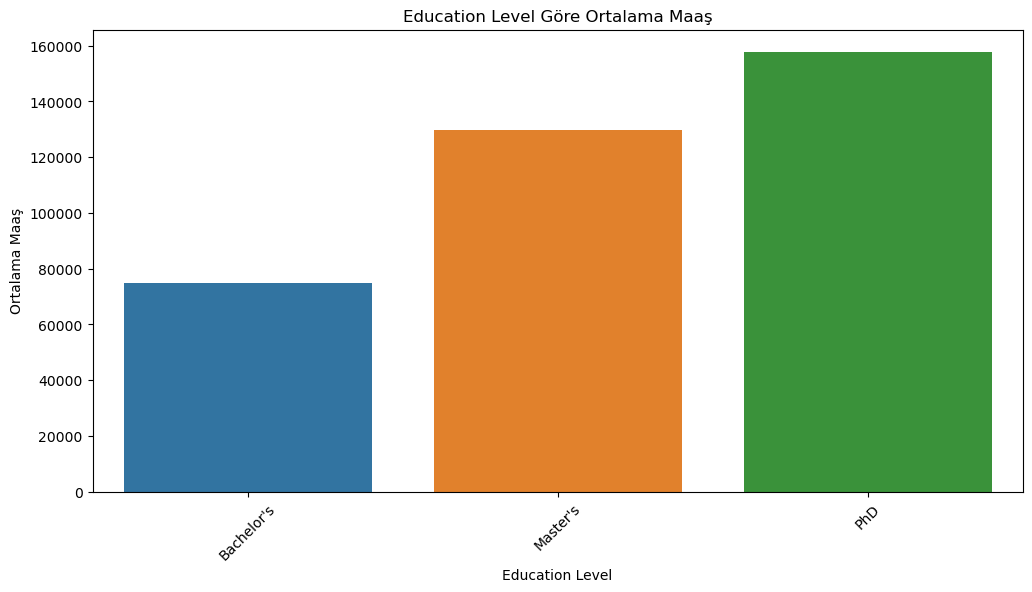

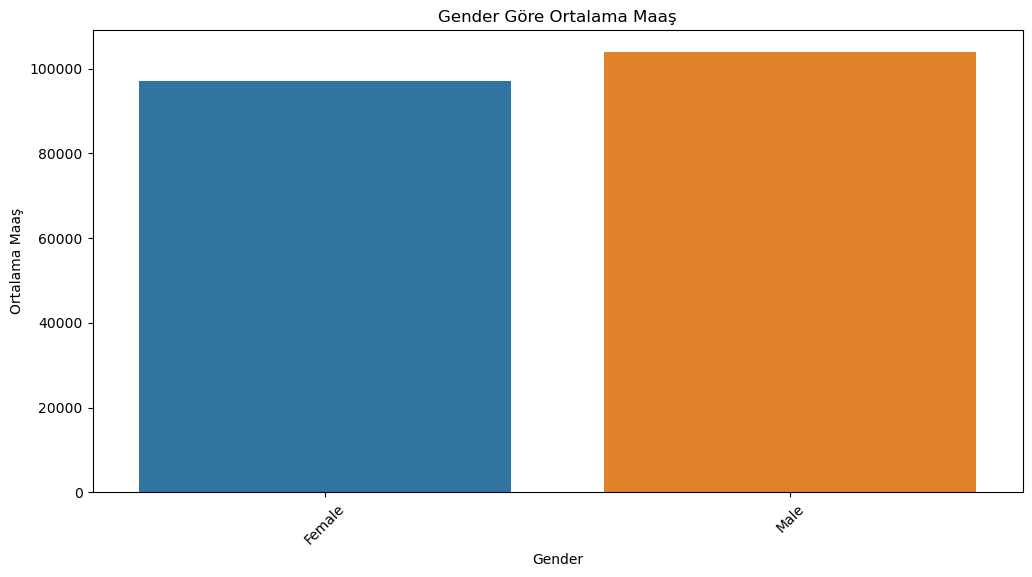

In [79]:
def ortalamaMaasaGore(data, group_column):
    plt.figure(figsize=(12, 6))
    mean_salaries = data.groupby(group_column)['Salary'].mean().reset_index()
    sns.barplot(x=group_column, y='Salary', data=mean_salaries)
    plt.title(f'{group_column} Göre Ortalama Maaş')
    plt.xlabel(group_column)
    plt.ylabel('Ortalama Maaş')
    plt.xticks(rotation=45)
    plt.show()
ortalamaMaasaGore(df, 'Education Level')
ortalamaMaasaGore(df, 'Gender')


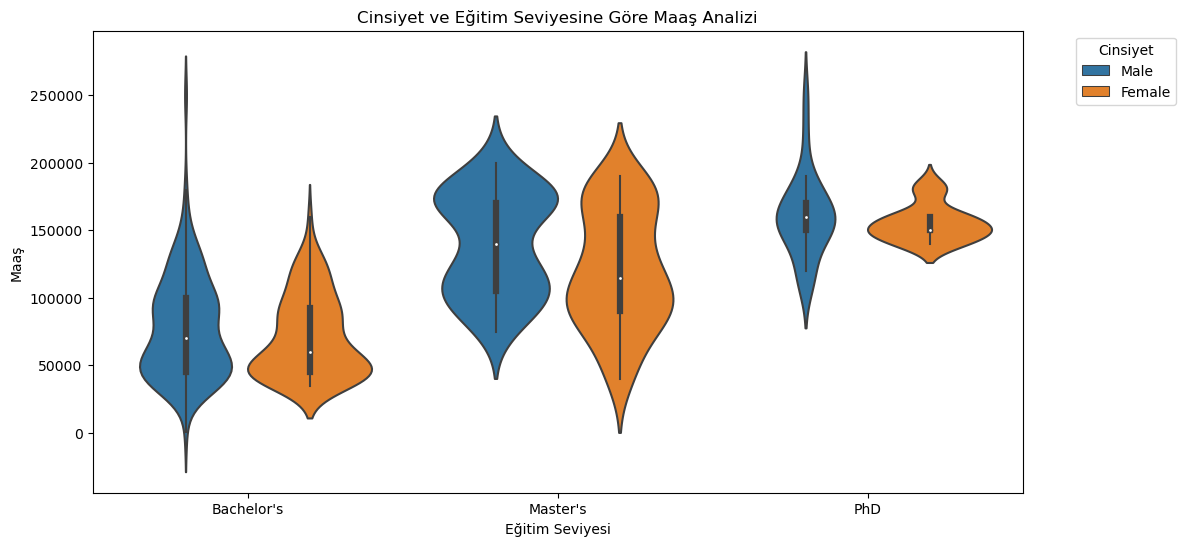

In [82]:
def cinsiyetEgitimXmaas(data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Education Level', y='Salary', hue='Gender', data=data)
    plt.title('Cinsiyet ve Eğitim Seviyesine Göre Maaş Analizi')
    plt.xlabel('Eğitim Seviyesi')
    plt.ylabel('Maaş')
    plt.legend(title='Cinsiyet', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
cinsiyetEgitimXmaas(df)

In [88]:
def aykiriDeger_tespiti(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [89]:
aykiriDeger_tespiti(df,"Age")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [98]:
aykiriDeger_tespiti(df,"Years of Experience")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [99]:
aykiriDeger_tespiti(df,"Salary")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
